In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [2]:
data = pd.read_csv('/home/akshay/Desktop/mle/notebook/data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = data.drop(columns=['math_score'], axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [4]:
y = data['math_score']

In [5]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(exclude='int').columns
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [8]:
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [10]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
X.shape

(1000, 19)

In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [14]:
def model_evaluate(true, predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, mse, r2_square

In [16]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}

model_list = []
r2_list = []

In [17]:
models.values()


dict_values([LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), <catboost.core.CatBoostRegressor object at 0x7feec4acac10>, XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)])

In [25]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate train and test
    model_train_mae, model_train_rmse, model_train_r2 = model_evaluate(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = model_evaluate(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("-- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-- Mean Squared Error: {:.4f}".format(model_train_mae))
    print("-- R2 Score: {:.4f}".format(model_train_r2))
    
    print("-------------------------------------------")
    
    print("Model performance for Test set")
    print("-- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-- Mean Squared Error: {:.4f}".format(model_test_mae))
    print("-- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("="*35)
    print("\n")
    
    

LinearRegression
Model performance for Training set
-- Root Mean Squared Error: 27.7640
-- Mean Squared Error: 4.2181
-- R2 Score: 0.8828
-------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 31.3062
-- Mean Squared Error: 4.3891
-- R2 Score: 0.8435


Lasso
Model performance for Training set
-- Root Mean Squared Error: 41.9622
-- Mean Squared Error: 5.1300
-- R2 Score: 0.8229
-------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 40.2276
-- Mean Squared Error: 4.9522
-- R2 Score: 0.7989


Ridge
Model performance for Training set
-- Root Mean Squared Error: 27.7582
-- Mean Squared Error: 4.2158
-- R2 Score: 0.8829
-------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 31.1062
-- Mean Squared Error: 4.3773
-- R2 Score: 0.8445


KNeighborsRegressor
Model performance for Training set
-- Root Mean Squared Error: 34.2490
-- Mean Squared Error: 4.650

In [22]:
print(list(models.keys()))

['LinearRegression', 'Lasso', 'Ridge', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'CatBoostRegressor', 'XGBRegressor']


In [34]:
pd.DataFrame(zip(model_list, r2_list), 
             columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Lasso,0.844507
0,LinearRegression,0.843507
7,AdaBoostRegressor,0.827956
6,RandomForestRegressor,0.805857
1,LinearRegression,0.798910
8,CatBoostRegressor,0.797030
5,DecisionTreeRegressor,0.794924
3,Ridge,0.747412
4,KNeighborsRegressor,0.614793


In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print('The r2 score of the model is: {:.2f}'.format(score))

The r2 score of the model is: 84.35


Text(0, 0.5, 'predicted')

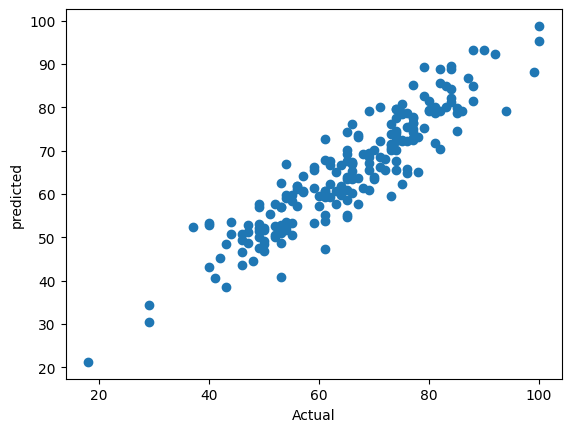

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

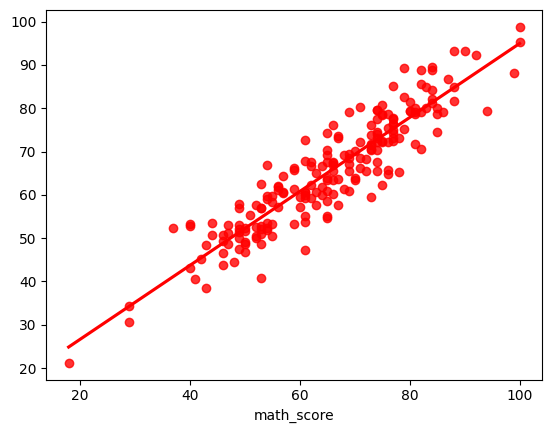

In [31]:
import seaborn as sns

sns.regplot(x = y_test, y = y_pred, ci=None, color='red')